In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# define histograms

renderer_names = {
    "p3d": "PyTorch3D",
    "sailenv": "SAILenv"
}


table = {
    "name": "table",
    "data": {
        "p3d": {
            "before": {
                "desk": 6,
                "dining_table": 37,
                "gong": 1,
                "guillotine": 2,
                "marimba": 12,
                "potter's_wheel": 1,
                "stretcher": 1
            },
            "after": {
                "chime": 1,
                "desk": 6,
                "dining_table": 2,
                "grand_piano": 1,
                "guillotine": 2,
                "lumbermill": 1,
                "marimba": 33,
                "potter's_wheel": 12,
                "stretcher": 2
            }
        },
        "sailenv": {
            "before": {
                "dining_table": 43,
                "gong": 1,
                "marimba": 14,
                "parallel_bars": 1,
                "potters_wheel": 1
            },
            "after": {
                "bell_cote": 1,
                "chime": 1,
                "desk": 2,
                "dining_table":15,
                "marimba": 38,
                "potters_wheel": 3
            }
        }
    }
}

remote = {
    "name": "remote",
    "data": {
        "p3d": {
            "before": {
                "loudspeaker": 2,
                "remote_control": 58
            },
            "after": {
                "bell_cote": 3,
                "cellular_telephone": 16,
                "hand-held_computer": 31,
                "ocarina": 1,
                "spatula": 1, 
                "stretcher": 1,
                "swing": 3,
                "thimble": 1, 
                "tray": 1,
                "vase": 2
            }
        },
        "sailenv": {
            "before": {
                "remote_control": 59,
                "water_jug": 1
            },
            "after": {
                "cellular_telephone": 12,
                "chain_saw": 1,
                "hand-held_computer": 4,
                "pencil_sharpener": 1,
                "remote_control": 39,
                "ski": 1,
                "sombrero": 1,
                "water_jug": 1
            }
        }
    }
}

to_plot = [table, remote]

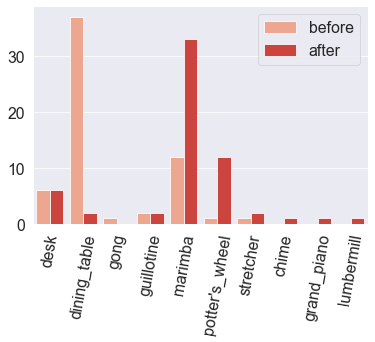

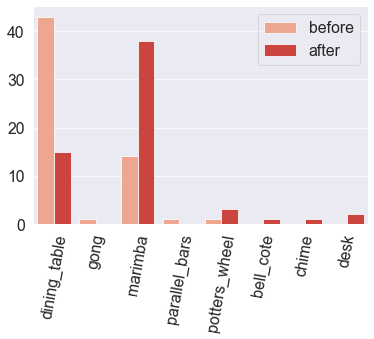

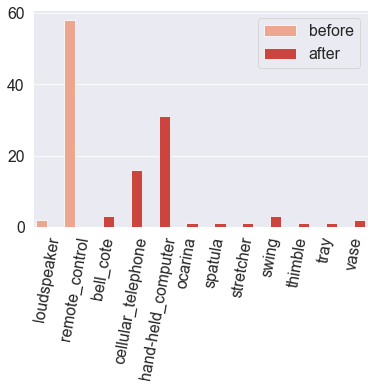

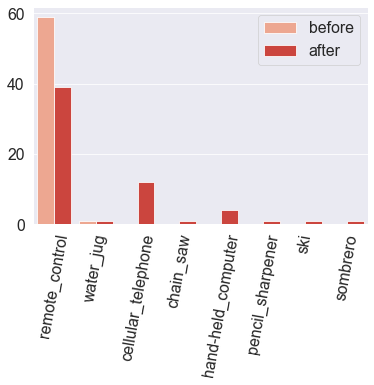

In [4]:

sns.set_theme()
sns.set_context("paper",font_scale=1.8)

for obj in to_plot:
    obj_name = obj['name']
    for renderer, data in obj['data'].items():

        df_data = []

        for when, class_dict in data.items():
            for class_name, count in class_dict.items():

                df_data.append({
                    "when": when,
                    "class_name": class_name,
                    "count": count
                })

        df = pd.DataFrame(df_data)

        plt.figure(figsize=(6,4))
        fig = sns.barplot(data=df, x='class_name', y='count', hue='when', palette="Reds")
        for item in fig.get_xticklabels():
            item.set_rotation(80)

        # plt.title(f"Predictions in {renderer_names[renderer]}")
        
        #fig.set_xlabel("Class")
        #fig.set_ylabel("Classifications count")
        fig.set(xlabel=None)
        fig.set(ylabel=None)
        fig.legend(loc='upper right')
        
        plt.savefig(f"./test/predictions_{obj_name}_{renderer}.pdf", bbox_inches = "tight")
        plt.show()
        
        plt.close(fig.get_figure())


    